In [1]:
# IMPORTING EXLPORATORY DATA ANALYSIS LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import seaborn as sns
import datetime
import pickle

In [2]:
#LOADING DATASETS
#CHECKING FOR SIZE, MISSING VALUES, COLUMN NAMES AND DISPLAYING A SLICE OF DATA
df_bikes=pd.read_csv('../datasets/bikeshare-final.csv')

# start_year = 'start_year'
# start_month = 'start_month'
# start_day = 'start_day'

# df_bikes.insert(4,'ride_time',0)
# df_bikes.insert(5,start_year,0)
# df_bikes.insert(6,start_month,0)
# df_bikes.insert(7,start_day,0)
# df_bikes.insert(8,'start_hour',0)


df_bikes.started_at=df_bikes.started_at.apply(lambda x: np.datetime64(x))
df_bikes.ended_at=df_bikes.ended_at.apply(lambda x: np.datetime64(x))

# for ind,row in df_bikes.iterrows():
#     df_bikes.at[ind,'ride_time'] = row['ended_at'] - row['started_at']
#     df_bikes.at[ind,'start_year']=str(row['started_at'])[:4]
#     df_bikes.at[ind,'start_month']=str(row['started_at'])[5:7]
#     df_bikes.at[ind,'start_day']=str(row['started_at'])[8:10]
#     df_bikes.at[ind,'start_hour']=str(row['started_at'])[11:13]
# df_bikes.sort_values('started_at',inplace = True)
# df_bikes.reset_index(drop = True,inplace= True)

display(df_bikes.shape)
display(df_bikes.isna().sum())
display(df_bikes.columns)
display(df_bikes.head(5))

# df_bikes.to_csv('../datasets/bikeshare-final.csv', index = False)


/home/alonp/Documents/CABerlin/module-1/assignment-02-capital-bikeshare/venv/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3169: DtypeWarning: Columns (12,14) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


(2169546, 20)

Unnamed: 0                 0
Unnamed: 0.1               0
ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
ride_time                  0
start_year                 0
start_month                0
start_day                  0
start_hour                 0
start_station_name    138604
start_station_id      138604
end_station_name      157000
end_station_id        157000
start_lat                 10
start_lng                 10
end_lat                 6923
end_lng                 6923
member_casual              0
dtype: int64

Index(['Unnamed: 0', 'Unnamed: 0.1', 'ride_id', 'rideable_type', 'started_at',
       'ended_at', 'ride_time', 'start_year', 'start_month', 'start_day',
       'start_hour', 'start_station_name', 'start_station_id',
       'end_station_name', 'end_station_id', 'start_lat', 'start_lng',
       'end_lat', 'end_lng', 'member_casual'],
      dtype='object')

,Unnamed: 0,Unnamed: 0.1,ride_id,rideable_type,started_at,ended_at,ride_time,start_year,start_month,start_day,start_hour,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,0,0,DDF4F5BCEE8D4DA1,docked_bike,2020-05-01 00:02:02,2020-05-01 00:04:10,0 days 00:02:08,2020,5,1,0,Thomas Circle,31241,17th St & Massachusetts Ave NW,31267.0,38.905900,-77.032500,38.908142,-77.038359,member
1,1,1,BAFB16BE2EC822A5,docked_bike,2020-05-01 00:03:34,2020-05-01 00:16:04,0 days 00:12:30,2020,5,1,0,25th St & Pennsylvania Ave NW,31237,16th & Irving St NW,31122.0,38.903827,-77.053485,38.928893,-77.036250,member
2,2,2,B333B92511C7363F,docked_bike,2020-05-01 00:21:01,2020-05-01 00:38:10,0 days 00:17:09,2020,5,1,0,Connecticut Ave & Tilden St NW,31313,Calvert & Biltmore St NW,31106.0,38.941139,-77.061977,38.923203,-77.047637,member
3,3,3,B4BD5B9BBAEC4B45,docked_bike,2020-05-01 00:21:09,2020-05-01 00:54:57,0 days 00:33:48,2020,5,1,0,25th St & Pennsylvania Ave NW,31237,Wilson Blvd & N Quincy St,31039.0,38.903827,-77.053485,38.880012,-77.107854,casual
4,4,4,9C26104CDECAD6E4,docked_bike,2020-05-01 00:30:26,2020-05-01 00:36:08,0 days 00:05:42,2020,5,1,0,2nd St & Massachusetts Ave NE,31641,1st & M St NE,31603.0,38.894972,-77.003135,38.905700,-77.005600,member


* The following table will show the bike use per hour in a day.
* If a bike was taken in a certain hour, and wasn't available in the following hour\s it will be counted as used for that hour.


In [4]:
#######################################
# I wanted to prove that the reason for the complaints could not be lack of bikes overall, therefore,
# I used this dataframe to count hourly bike use 

#######################################
# days = df_bikes['started_at'].copy()
# days = days.apply(lambda x: str(x)[:10]).unique()
# hours = list([f'0{h}' if h < 10 else str(h) for h in range(0,24,1)])

# dfs = []
# for day in days:
#     local_df=pd.DataFrame({'hour':hours})
#     local_df['date'] = day
#     local_df['bikes_used'] = 0
#     dfs.append(local_df)


# df_bike_use = pd.concat(dfs)
# dates = df_bike_use['date'].copy()
# df_bike_use.drop('date',axis = 1, inplace = True)
# df_bike_use.insert(0,'date',dates)
# df_bike_use.reset_index(drop=True,inplace = True)


# df_bike_use.insert(1,'year',0)
# df_bike_use.insert(2,'month',0)
# for ind,row in df_bike_use.iterrows():
#     df_bike_use.at[ind,'year']=row.date[:4]
#     df_bike_use.at[ind,'month']=row.date[5:7]
#     df_bike_use.at[ind,'date'] = np.datetime64(f'{row.date}T{row.hour}:00:00')

# #select a day
# for i_day,day in enumerate(days):
#     for i_hour, hour in enumerate(hours):
#         d_low = f'{day}T{hour}:00:00'
#         d_high = f'{day}T{hour}:59:59'
#         local_df_on_start = df_bikes[(df_bikes.started_at>=np.datetime64(d_low)) & (df_bikes.started_at<=np.datetime64(d_high))]
# #       THE IMPORTANT PART: Here I consider rides that started before the selcted hour, but ended after it,
# #         e.g bikes that weren't available during that hour

#         local_df_on_end = df_bikes[(df_bikes.started_at<=np.datetime64(d_low)) & (df_bikes.ended_at>=np.datetime64(d_high))]
#         local_df = pd.concat([local_df_on_start,local_df_on_end])
#         ind_update = df_bike_use.index[(df_bike_use.date == np.datetime64(d_low)) & (df_bike_use.hour == hour)].tolist()[0]
#         df_bike_use.at[ind_update,'bike_used'] = local_df.shape[0]

# df_bike_use.sort_values('date', ascending=True, inplace = True)

# # df_bike_use.insert(1,'year_month','')
# df_bike_use['year_month']=''
# for ind,row in df_bike_use.iterrows():
#     df_bike_use.at[ind,'year_month']= f'{row.year}-{row.month}'

# df_bike_use.to_csv('../datasets/bike_use_final.csv', index = False)

df_bike_use = pd.read_csv('../datasets/bike_use_final.csv')

In [8]:
# df_bike_use.head(3)

,date,year,month,hour,bikes_used,bike_used,year_month
0,2020-05-01T00:00:00,2020,5,0,0,9.0,2020-5
1,2020-05-01T01:00:00,2020,5,1,0,0.0,2020-5
2,2020-05-01T02:00:00,2020,5,2,0,4.0,2020-5


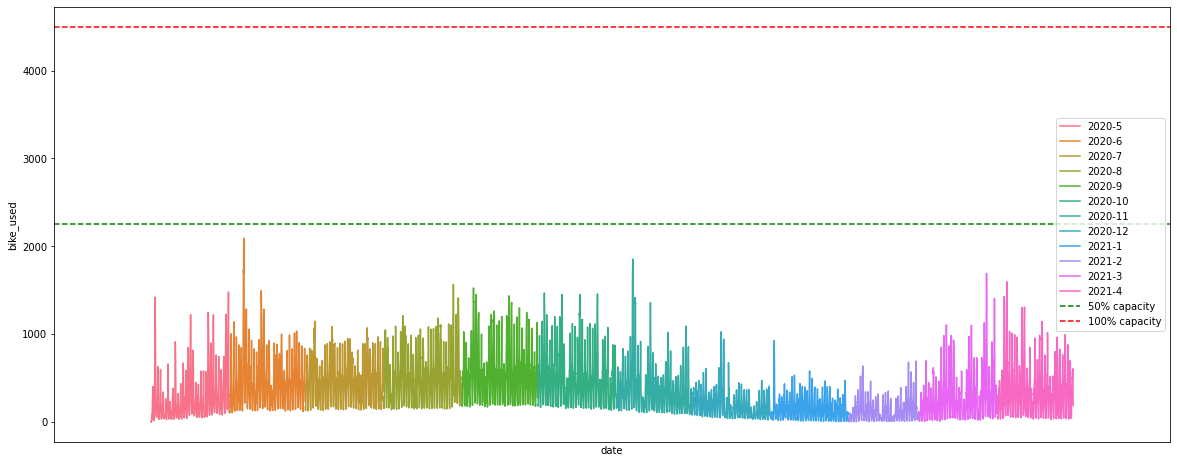

In [10]:
# Plotting the hourly bike use, with horizontal lines represnting the median of total bikes available (~4500 in 2020/2021)
# Even peak bike use doesn't pass half of the total bike capcity, therefore, I will continue to check the hypothesis that 
# different stations have significantly different ride start counts
fig,ax = plt.subplots(ncols=1,nrows=1,figsize=(20,8))
sns.lineplot(data=df_bike_use, x='date',y='bike_used', hue='year_month',ax=ax)
lims =  ax.get_xlim()
ax.axline((lims[0],4500/2), (lims[1],4500/2), c='g',linestyle='--' , label ='50% capacity')
ax.axline((lims[0],4500), (lims[1],4500), c='r',linestyle='--' , label ='100% capacity')
# plt.setp(ax.get_xticklabels(),rotation=70)
plt.xticks([])
ax.legend()
plt.savefig('../plots/hourly-use.png')

In [7]:
df_bike_use.describe()

,Unnamed: 0,Unnamed: 0.1,year,month,hour,bikes_used,bike_used
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.0,8760.000000
mean,4379.500000,4379.500000,2020.328767,6.526027,11.500000,0.0,345.696119
std,2528.938512,2528.938512,0.469792,3.448048,6.922582,0.0,293.461580
min,0.000000,0.000000,2020.000000,1.000000,0.000000,0.0,0.000000
25%,2189.750000,2189.750000,2020.000000,4.000000,5.750000,0.0,134.750000
50%,4379.500000,4379.500000,2020.000000,7.000000,11.500000,0.0,256.000000
75%,6569.250000,6569.250000,2021.000000,10.000000,17.250000,0.0,483.000000
max,8759.000000,8759.000000,2021.000000,12.000000,23.000000,0.0,2093.000000


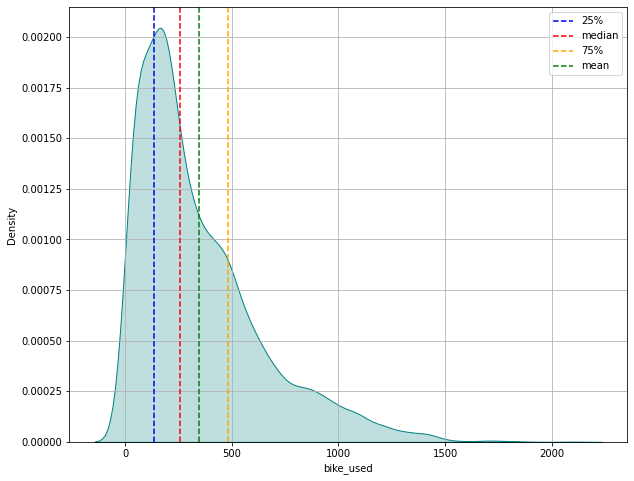

In [82]:
# This plot shows that 25% of the hours have more than 483 bikes in use, most of the hours the bike use is under it.
fig, ax =plt.subplots(figsize=(10,8))
sns.kdeplot(data=df_bike_use,x='bike_used',color='teal',fill=True,ax=ax)
ax.grid(b=True, which='both')
ax.axvline(134.75, c="b",linestyle='--',label='25%')
ax.axvline(256, c="r",linestyle='--',label='median')
ax.axvline(483, c="orange",linestyle='--',label='75%')
ax.axvline(345.696119, c="g",linestyle='--',label='mean')
ax.legend()
plt.savefig('../plots/use-dist.png')

In [11]:
#######################################
# This dataframe is used to count ride starts per hour in each station

#######################################
df_station_use_count=pd.read_csv('../datasets/station_use_count.csv')

# # dfs_stations = []


# for ind in df_bike_use.date.sort_values().to_numpy():
#     str_date=str(ind)
#     # print(str_date)
#     year,month,day = tuple((str_date.split('T')[0].split('-')))
#     hour = str_date.split('T')[1][:2]
#     local_date = datetime.datetime(int(year),int(month),int(day))

# #     CREATE A LOCAL DATAFRAME

#     local_df = pd.DataFrame()

#     df_bikes_cut = df_bikes[(df_bikes.started_at >= ind) & (df_bikes.started_at <= np.datetime64(f'{year}-{month}-{day} {hour}:59:59'))]
#     local_df.insert(0,'stations',df_bikes_cut.start_station_name.unique())
#     local_df.insert(0,'date',local_date)
#     local_df.insert(1,'year',local_date.year)
#     local_df.insert(2,'month',local_date.month)
#     local_df.insert(3,'day',local_date.day)
#     local_df.insert(4,'hour',int(hour))
#     local_df.insert(5,'is_workday',1)
#     local_df.insert(7,'starts_count',0)

#     d_starts_count = {}
#     for station in df_bikes_cut.start_station_name.unique():
#         #count the number of entries with the station name
#         station_count = df_bikes_cut[df_bikes_cut.start_station_name == station].start_station_name.describe()['count']
#         #add it to d_starts_count
#         d_starts_count[station] = station_count

#     #update each station start_count
#     for ind, row in local_df.iterrows():
#         local_df.at[ind,'starts_count'] = d_starts_count[row.stations]
#         local_df.at[ind,'is_workday'] = 1 if str_date.split('T')[0] in holidays or local_date.day > 4 else 0

#     dfs_stations.append(local_df)

# df_station_use_count = pd.concat(dfs_stations)

# dates = df_station_use_count['date'].copy()
# df_station_use_count.drop('date',axis = 1, inplace = True)
# df_station_use_count.insert(0,'date',dates)
# df_station_use_count.reset_index(drop=True,inplace = True)

# holidays = ['2020-05-25',
#             '2020-07-03',
#             '2020-07-04',
#             '2020-09-07',
#             '2020-10-12',
#             '2020-11-11',
#             '2020-11-26',
#             '2020-12-25',
#             '2021-01-01',
#             '2021-01-18',
#             '2021-01-20',
#             '2021-02-15',
#             '2021-04-16']
# def is_workday(date):
#     if date in holidays or pd.Timestamp(date).weekday() > 4:
#         return 0
#     else:
#         return 1
# for ind,row in df_station_use_count.iterrows():
#     df_station_use_count.at[ind,'is_workday'] = is_workday(row.date)
# df_station_use_count.drop_duplicates(subset = list(df_station_use_count.columns), ignore_index = True, inplace = True)

# df_station_use_count.to_csv('../datasets/station_use_count.csv', index = False)
# del dfs_stations

In [13]:
df_station_use_count[df_station_use_count.is_workday == 1].head(5)

,date,year,month,day,hour,stations,starts_count,is_workday
3168,2020-05-04,2020,5,4,17,11th & S St NW,4,1.0
3169,2020-05-04,2020,5,4,17,15th St & Constitution Ave NW,3,1.0
3170,2020-05-04,2020,5,4,17,L'Enfant Plaza / 7th & C St SW,1,1.0
3171,2020-05-04,2020,5,4,17,1st & M St SE,4,1.0
3172,2020-05-04,2020,5,4,17,8th & D St NW,5,1.0


In [24]:
#######################################
# THIS DATAFRAME IS USED TO CALCULATE THE FREQUENCY OF STATIONS WITH ABOVE AVERAGE RIDE STARTS

#######################################
df_stations_hist = pd.read_csv('../datasets/stations_hist.csv')
# # select the hours between 6 am to 8 pm

# local_df = df_station_use_count[(df_station_use_count.hour >= 6)&(df_station_use_count.hour <=20)]
# stations_hist = {}

# # in  hour 'x' find the average starts count
# for date in df_station_use_count.date.unique():
#     local_df_date = local_df[local_df.date == date]
#     for hour in local_df_date.hour.unique():
#         df_local_hour = local_df_date[local_df_date.hour == hour]
#         mean_bike_start = df_local_hour.starts_count.describe()['mean']
# # in hour 'x' count the stations that have above average use counts
#         above_mean = df_local_hour[df_local_hour.starts_count > mean_bike_start].stations.to_numpy()
#         for station in above_mean:
#                 if station in stations_hist.keys():
#                         stations_hist[station]+=1
#                 else:
#                         stations_hist[station] = 1

# # plot a bar graph of the stations frequency
# df_stations_hist = pd.DataFrame(columns=['station','count'] )
# df_stations_hist.station = np.array(list(stations_hist.keys()))
# for ind,row in df_stations_hist.iterrows():
#         df_stations_hist.at[ind,'count'] = stations_hist[row.station]

# df_stations_hist['count']=df_stations_hist['count'].apply(lambda x: np.float64(x))
# df_stations_hist.sort_values(['count'], ascending = False, inplace = True)
# df_stations_hist.reset_index(drop = True, inplace = True)

# df_stations_hist.to_csv('../datasets/stations_hist.csv', index = False)
# del stations_hist
# del local_df

In [45]:
# df_stations_hist.sort_values('count', ascending = False)

display(df_stations_hist['count'].describe())
display(df_stations_hist.head(10))
# df_stations_hist.to_csv('../datasets/stations_hist.csv', index = False)

count     630.000000
mean      277.277778
std       399.069108
min         1.000000
25%        14.000000
50%        70.000000
75%       379.250000
max      1856.000000
Name: count, dtype: float64

,station,count
0,New Hampshire Ave & T St NW,1856.0
1,1st & M St NE,1836.0
2,15th & P St NW,1836.0
3,Lincoln Memorial,1833.0
4,4th St & Madison Dr NW,1726.0
5,Jefferson Dr & 14th St SW,1692.0
6,4th & M St SW,1650.0
7,11th & M St NW,1631.0
8,Henry Bacon Dr & Lincoln Memorial Circle NW,1620.0
9,14th & Irving St NW,1618.0


In [114]:
#######################################
# HERE, I ADD A LABEL REPRESENTING RANK RANGE OF STATIONS ACCORDING TO THEIR RIDE STARTS. THIS LABEL WOULD BE USED LATER IN ANOVA TO DETERMINE THAT STATIONS HAVE STATISTICALLY DIFFERENT RIDE STARTS

#######################################

def set_label(rank):
    return 'top to 80%' if rank > .8 else '80% to 60%' if rank > .6 else '60% to 40%' if rank > .4 else '40% to 20%' if rank > .2 else '20% to bottom'

df_stations_hist['rank']=df_stations_hist['count'].rank(pct = True)

df_stations_hist['bin'] = ''
for ind,row in df_stations_hist.iterrows():
    df_stations_hist.at[ind,'bin'] = set_label(row['rank'])

df_stations_hist.head(5)

,station,count,rank,bin
0,New Hampshire Ave & T St NW,1856.0,1.000000,top to 80%
1,1st & M St NE,1836.0,0.997619,top to 80%
2,15th & P St NW,1836.0,0.997619,top to 80%
3,Lincoln Memorial,1833.0,0.995238,top to 80%
4,4th St & Madison Dr NW,1726.0,0.993651,top to 80%


group1,group2,meandiff,p-adj,lower,upper,reject
20% to bottom,40% to 20%,0.2016,0.001,0.1817,0.2215,True
20% to bottom,60% to 40%,0.4,0.001,0.38,0.42,True
20% to bottom,80% to 60%,0.5984,0.001,0.5785,0.6183,True
20% to bottom,top to 80%,0.7984,0.001,0.7785,0.8183,True
40% to 20%,60% to 40%,0.1984,0.001,0.1784,0.2184,True
40% to 20%,80% to 60%,0.3968,0.001,0.3769,0.4168,True
40% to 20%,top to 80%,0.5968,0.001,0.5769,0.6168,True
60% to 40%,80% to 60%,0.1984,0.001,0.1784,0.2184,True
60% to 40%,top to 80%,0.3984,0.001,0.3784,0.4184,True
80% to 60%,top to 80%,0.2,0.001,0.1801,0.2199,True


/home/alonp/Documents/CABerlin/module-1/assignment-02-capital-bikeshare/venv/lib/python3.9/site-packages/statsmodels/sandbox/stats/multicomp.py:775: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.insert(self.groupsunique.astype(str), 0, ''))


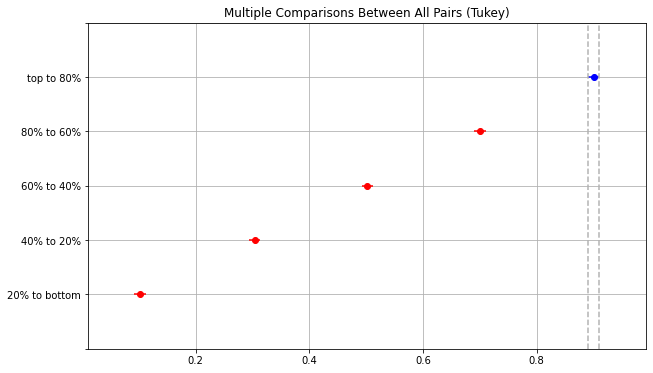

In [135]:
#######################################
# I USE A PAIRWISE ANOVA WITH TUKEY'S HSD METHOD TO DETERMINE WHETHER STATIONS IN DIFFERENT RANK RANGES HAVE STATISTICALLY SIGNIFICANT RIDE STARTS, AND I PLOT THE RESULTS IN A GRAPH SHOWING CONFIDENCE INTERVALS OVERLAP (OR LACK THEREOF)

#######################################
tukey_result = pairwise_tukeyhsd(df_stations_hist['rank'],df_stations_hist['bin'])
display(tukey_result.summary())
fig,axes = plt.subplots(nrows = 1, ncols = 1)
tukey_result.plot_simultaneous(comparison_name = 'top to 80%',ax = axes)
axes.grid(b=True, which='both')
plt.savefig('../plots/station-hsd.png')

### Total bikes available: 4500 bikes
### Null hypothesis: Bike shortage is caused by a high percentage of bikes usage
### Alternative hypothesis: Bike shortage is caused by local demand in certain stations
### Opposite: In hours of high demand, there's no statistical significant variance of bike use within stations
* 
